__Задача 1__

Дана матрица объект-признак
```
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]
```
и значения целевой переменной
```
y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]
```

1. Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
2. Является ли значимым получившееся уравнение регрессии?

In [1]:
import numpy as np
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
X = np.array([
     [ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]
])

y = np.array([9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
             7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218])

In [3]:
R2 = 0
for ij in combinations(range(X.shape[1]), r=2): # все комбинации признаков
    x = X[:, ij] # оставляем 2 признака
    model = LinearRegression().fit(x, y) # cоздадим модель и потренеруем ее
    y_predict = model.predict(x) # предскажем данные
    r2 = r2_score(y, y_predict) # оценим модель
    if r2 > R2: # ecли наша модель лучшая
        R2 = r2 # сохраним значение ее оценки
        IJ = ij # и номера столбцов
        best_model = model
print(f'Наилучшая модель построина на признаках {IJ[0]} и {IJ[1]}.')
print(f'Значение коэффициента детермиции этой модели {round(R2, 2)}')

Наилучшая модель построина на признаках 0 и 2.
Значение коэффициента детермиции этой модели 0.76


__Задача 2__

Даны значения величины заработной платы заемщиков банка (`salary`) и значения их поведенческого кредитного скоринга (`scoring`):
```
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
```
Возьмём в качестве признака значение `salary`, а в качестве целевой переменной - `scoring`.

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
2. Постройте `scatter plot` по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
3. Посчитайте коэффициент детерминации.
4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
5. (доп) Посчитать среднюю ошибку аппроксимации

In [4]:
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Найдите коэффициенты линейной регрессии

In [5]:
x1 = np.array(salary)
y1 = np.array(scoring)

b1 = (np.mean(x1 * y1) - np.mean(x1) * np.mean(y1)) / (np.mean(x1 ** 2) - np.mean(x1) ** 2)
b0 = np.mean(y1) - b1 * np.mean(x1)

b0, b1

(444.1773573243596, 2.620538882402765)

In [6]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

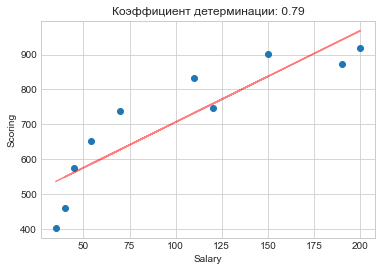

In [7]:
plt.scatter(x1, y1)
plt.plot(x1, b0 + b1 * x1, color='red', alpha=0.5)
plt.xlabel('Salary')
plt.ylabel('Scoring')
R1 = np.corrcoef(x1, y1)[0, 1] ** 2
plt.title(f'Коэффициент детерминации: {round(R1, 2)}')
plt.show()

Проверим значимость уравнения регрессии

In [8]:
n = x1.shape[0]
m = 1

k1 = m
k2 = n - m - 1

k1, k2

(1, 8)

Возьмём уровень значимости $\alpha = 0.05$. Нужный нам квантиль можно посчитать с помощью функции `scipy.stats.f.ppf`:

In [9]:
from scipy import stats

In [10]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

5.317655071578714

Итак, критическая область:
$$\Omega_\alpha = \left( 5.31, \infty \right)$$

In [11]:
F = (R1 / k1) / ((1 - R1) / k2)
F

29.671640859664432

Статистика попала в критическую область, уравнение регрессии признаётся значимым.

Посчитать среднюю ошибку аппроксимации

In [12]:
z1 = b0 + b1 * x1

In [13]:
def mean_approximation_error(y_real, y_pred):
    return np.abs((y_real - y_pred) / y_real).mean()

In [14]:
mean_approximation_error(y1, z1)

0.11469251843561709